# **Lab 7: Convolutional Neural Networks**



The purpose of this lab is to explore more complex structures in neural networks beyond simple fully-connected networks. In particular, we focus on deep convolutional nerual networks (CNNs) for image classification as CNNs have become the dominant model for many computer vision tasks. Instead of implementing CNNs from scratch, we introduce some popular deep learning toolkits, such as *Tensorflow* and *Pytorch*, and use some examples to show how to use these toolkits to conveniently build various CNN structures and efficiently train/evaluate them with available training/test data. 



The most important feature in these popular deep learning toolkits (either *Tensorflow* or *Pytorch*) is to provide some flexible ways for us to specify various networks structures. These toolkits usually come up with many different syntaxes from various levels for this purpose. Some low-level syntaxes allow us to conveniently customize neural networks  in any way we prefer while other high-level syntaxes offer legible and flexible interfaces to configure  popular network structures in the literature. These toolkits allow us to directly use many popular building blocks introduced in [MLF] without reinventing the wheel, such as full connection, convolution, activation, softmax, attension, feedback and normalization layers. On the other hand, it also provides nice interfaces for us to implement any new modules. 

Another advantage to use these toolkits is that they come up with automatic differentiation (AD) module so that we do not need to explicitly implement error back-propagation. The learning process is almost totally automatic as long as we specify some key ingredients, such as a loss function, an optimization algorithm and relevant hyperparameters. Finally, these toolkits also provide a full support to allow us to flexibly switch hardware devices between CPUs, GPUs and even TPUs for the training/testing processes. 

In this Lab, we only introduce how to use the high-level *Keras* style syntax to build deep convolutional neural networks for image classification tasks. When we use the *Keras* interface to build any complex neural networks, it usually consists of the following three steps:

1.   **Define**: we use some highly legible syntax to clearly define the structure of neural networks in a layer by layer manner. In this step, we need to specify all network details in a static structure. 

2.   **Compile**: we compile the previously defined static network by associating it with some dynamic components, such as a loss function, an optimizer along with its hyperparameters, a hardware device to be used (CPUs or GPUs), an evaluation matric, etc. 

3.   **Fit**: we fit the compiled model to the available training data (as well as the corresponding target labels). It will run the specified optimizer and use the automatically derived gradients from AD to learn the model on the specified hardware device. 

In the following, we will use several examples to show how to do these three steps for convolutional neural networks using *Tensorflow* and *Pytorch*. 

## **I. Using TensorFlow**

### **Fully connected layers**
#### **Example 1**
*Use Tensorflow to re-implement the fully-connected neural networks and compare it with various implementations in last Lab in terms of classification accuracy and running speed.* 

Here we can use an integer (between 0 and 9) as the target label for each image. For this case, we need to specify the CE loss function as "*sparse_categorical_crossentropy*" in *Tensorflow*. If we use the one-hot vector as the target label for each image, we need to specify the CE loss function as "*categorical_crossentropy*" in *Tensorflow*. Note that *Tensorflow* uses GPUs by default as long as  GPUs are available.

In [2]:
# install python_mnist
!pip install python_mnist

In [1]:
#load MINST images

from mnist import MINST
import numpy as np

mnist_loader = MNIST('drive/My Drive/')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()
X_train = np.array(train_data, dtype='float')/255.0 # norm to [0,1]
y_train = np.array(train_label, dtype='short')
X_test = np.array(test_data, dtype='float')/255.0 # norm to [0,1]
y_test = np.array(test_label, dtype='short')

#reshape each input vector (784) into a 28*28*1 image 
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_test = np.reshape(X_test, (-1,28,28,1))

# convert MNIST labels into 10-D one-hot vectors - upper-case label y
Y_train = np.zeros((y_train.size, y_train.max()+1))
Y_train[np.arange(y_train.size),y_train] = 1
Y_test = np.zeros((y_test.size, y_test.max()+1))
Y_test[np.arange(y_test.size),y_test] = 1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, Y_train.shape, Y_test.shape)

ImportError: cannot import name 'MNIST' from 'mnist' (/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mnist/__init__.py)

In [ ]:
# use tensorflow to implement a fully-connected neural networks (same structure as Lab6)
#
# use integers as target labels and specify CE loss as "sparse_categorical_crossentropy"

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras
model0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# compile model by attaching with loss/optimizer/metric
model0.compile(loss="sparse_categorical_crossentropy",# CE loss for integer label. output is an integer [0] means class 0 [1] means class1
              optimizer=keras.optimizers.SGD(learning_rate=1e-1),
              metrics=["accuracy"])

# fit to training data to learn the model
history0 = model0.fit(X_train, y_train, epochs=10,          # y_train: integer labels
                    validation_data=(X_test, y_test))     # y_test: integer labels

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2487 - accuracy: 0.9260 - val_loss: 0.1238 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0992 - accuracy: 0.9699 - val_loss: 0.1099 - val_accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0650 - accuracy: 0.9809 - val_loss: 0.0695 - val_accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.0682 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0616 - val_accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0602 - val_accuracy:

In [ ]:
# use tensorflow to implement a fully-connected neural networks
# use one-hot target labels and specify CE loss as "categorical_crossentropy"

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras  (same network structure as Lab5)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# compile model by attaching with loss/optimizer/metric
model.compile(loss="categorical_crossentropy",      # CE loss for one-hot vector label. output is a one-hot vector [0,0,1,0] 
              optimizer=keras.optimizers.SGD(learning_rate=1e-1),
              metrics=["accuracy"])

# fit to training data to learn the model  
history = model.fit(X_train, Y_train, epochs=10,        # Y_train: one-hot vector labels  
                    validation_data=(X_test, Y_test))   # Y_test: one-hot vector labels
                    

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2487 - accuracy: 0.9261 - val_loss: 0.1223 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0990 - accuracy: 0.9701 - val_loss: 0.1096 - val_accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0682 - val_accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.0685 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0684 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0616 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0171 - accuracy: 0.9952 - val_loss: 0.0578 - val_accuracy

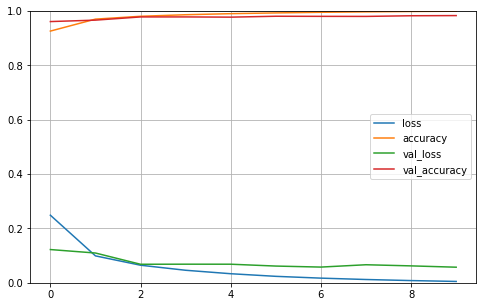

In [ ]:
# show the learning curves 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 250)               125250    
                                                                 
 dense_8 (Dense)             (None, 10)                2510      
                                                                 
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# show the GPU type used in the above computation

!nvidia-smi

Mon Nov 14 03:59:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    28W /  70W |   1516MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Convolutional Neural Networks**
#### **Example 2**

*Use Tensorflow to implement the convolutional neural networks as structrued in the image, and evaluate its performance using the MNIST data set and compare it with the fully-connected neural networks in the previous example.* 
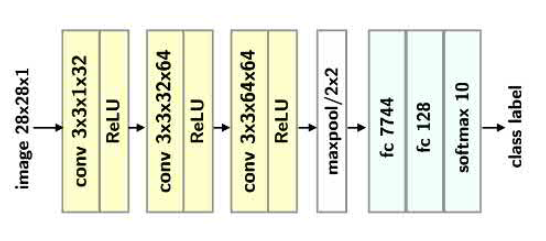

In [ ]:
# use tensorflow to implement a convolutional neural network 

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', 
                        padding='same', input_shape=[28, 28, 1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=7744, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# compile model by attaching loss/optimizer/metric components
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-2),
              metrics=["accuracy"])

# learning a model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
 618/1875 [========>.....................] - ETA: 21s - loss: 0.4425 - accuracy: 0.8651

KeyboardInterrupt: ignored

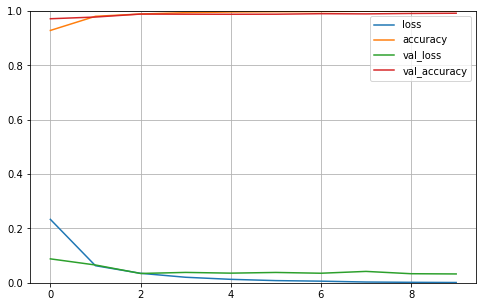

In [ ]:
# show the learning curves 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

From the above results, we can see that this simple CNN yields better performance than FCNNs as its best classification accuracy on the test set is 99.18%. 

In the above implementation, *padding='same'* indciates that proper zero-paddings are added prior to convolution so that the generated outputs have the same dimensions as the inputs. This is clear from the following model summary:

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_9 (Dense)             (None, 7744)              97148480  
                                                      

### Deeper CNN:
#### **Example 3**
*Use Tensorflow to implement a deeper convolutional neural networks as shown, and evaluate its performance using the MNIST data set.*  
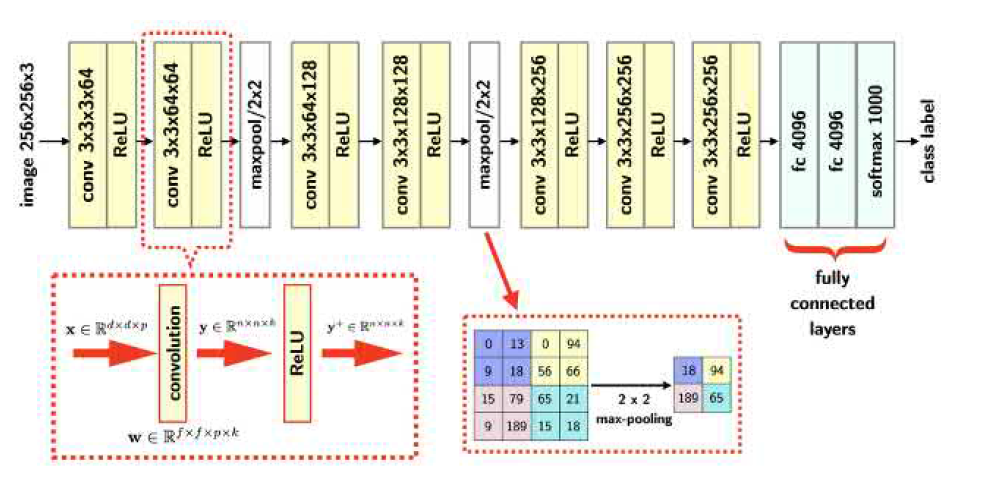

In [ ]:
# use tensorflow to implement a convolutional neural networks 

import numpy as np
import tensorflow as tf
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', \
                        padding='same', input_shape=[28, 28, 1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=4096, activation='relu'),
    keras.layers.Dense(units=4096, activation='relu'),
    keras.layers.Dense(units=1000, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# compile model by attaching with loss/optimizer/metric
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=5e-2),
              metrics=["accuracy"])

# learning a model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3113 - accuracy: 0.8977 - val_loss: 0.0437 - val_accuracy: 0.9871
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0226 - val_accuracy: 0.9924
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0252 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0271 - val_accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0307 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0217 -

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

## **II. Using Pytorch**

In general, *Pytorch* follows a similar pipeline of model construction as *Tensorflow*. Refer to an online [Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for more details. In the following examples, we use a keras-style package for Pytorch, namely *torchkeras*. As a result, we can similarly follow the above three steps in building CNNs using *Pytorch*. 

### **Activities**

1. Use *Tensorflow*  to implement a CNN model as in example 3 and evaluate it on [the CIFAR10 and CIFAR100 data sets](https://www.cs.toronto.edu/~kriz/cifar.html.
2. Vary the structures in this CNN model slightly to see whether you can further improve the performance on the test set. 